In [44]:
import pandas as pd
import requests
import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

import config

In [45]:
url_main = 'http://api.census.gov/data/2018/abstcb'
url_columns = '?get=NAME,IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,EMP'
url_focus = '&for=state:*'
url_key = f'&key={config.key}'
full_url = f'{url_main}{url_columns}{url_focus}{url_key}'
response = requests.get(full_url)

In [46]:
df = pd.read_json(response.text)
# Puts column labels in proper places
df.columns = df.iloc[0]
df.drop(index=0, inplace=True)
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df['EMP'] = df['EMP'].astype(int)

In [68]:
large_firms = df[(df['NAME'].str.contains('Del'))&(df['IMPACTWF_U_LABEL'].str.contains('Artificial'))]
large_firms = large_firms[(large_firms['IMPACTWF_U_LABEL'].str.contains('skill level'))|(large_firms['IMPACTWF_U_LABEL'].str.contains('number'))|(large_firms['IMPACTWF_U_LABEL'].str.contains('Total'))]
large_firms.reset_index(drop=True,inplace=True)
total = large_firms['FIRMPDEMP'].loc[6]
large_firms['percentage'] = ((large_firms['FIRMPDEMP']/total)*100).round(0)
large_firms['result'] = large_firms['IMPACTWF_U_LABEL'].str[25:]
large_firms.head(20)

,NAME,IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,FIRMPDEMP,EMP,state,percentage,result
0,Delaware,T1E05D01,Artificial Intelligence: Increased number of w...,001,All firms,255,12373,10,24.0,Increased number of workers employed by this b...
1,Delaware,T1E05D02,Artificial Intelligence: Decreased number of w...,001,All firms,20,4685,10,2.0,Decreased number of workers employed by this b...
2,Delaware,T1E05D03,Artificial Intelligence: Did not change number...,001,All firms,773,18731,10,74.0,Did not change number of workers employed by t...
3,Delaware,T1E05D04,Artificial Intelligence: Increased skill level...,001,All firms,492,20684,10,47.0,Increased skill level of workers employed by t...
4,Delaware,T1E05D05,Artificial Intelligence: Decreased skill level...,001,All firms,0,0,10,0.0,Decreased skill level of workers employed by t...
5,Delaware,T1E05D06,Artificial Intelligence: Did not change skill ...,001,All firms,507,14233,10,48.0,Did not change skill level of workers employed...
6,Delaware,T1E05D99,Artificial Intelligence: Total Reporting,001,All firms,1047,35789,10,100.0,Total Reporting


In [69]:
large_firms.rename(columns={"FIRMPDEMP":"firms","EMP":"employees"},inplace=True)
large_firms.head()

,NAME,IMPACTWF_U,IMPACTWF_U_LABEL,NSFSZFI,NSFSZFI_LABEL,firms,employees,state,percentage,result
0,Delaware,T1E05D01,Artificial Intelligence: Increased number of w...,001,All firms,255,12373,10,24.0,Increased number of workers employed by this b...
1,Delaware,T1E05D02,Artificial Intelligence: Decreased number of w...,001,All firms,20,4685,10,2.0,Decreased number of workers employed by this b...
2,Delaware,T1E05D03,Artificial Intelligence: Did not change number...,001,All firms,773,18731,10,74.0,Did not change number of workers employed by t...
3,Delaware,T1E05D04,Artificial Intelligence: Increased skill level...,001,All firms,492,20684,10,47.0,Increased skill level of workers employed by t...
4,Delaware,T1E05D05,Artificial Intelligence: Decreased skill level...,001,All firms,0,0,10,0.0,Decreased skill level of workers employed by t...


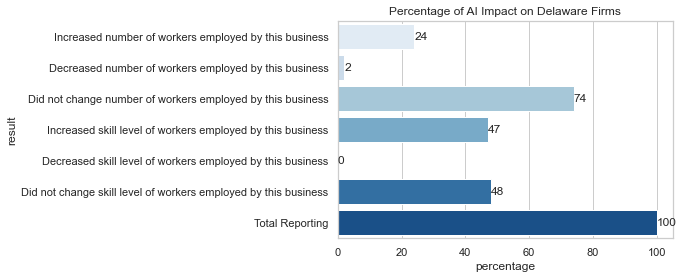

In [72]:
ax = sns.barplot(x="percentage", y="result", data=large_firms, palette='Blues')
ax.set_title("Percentage of AI Impact on Delaware Firms")
for container in ax.containers:
    ax.bar_label(container)